In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

# Initialize the model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")


In [2]:
from typing import Dict, Any, TypedDict
class TransactionState(TypedDict):
    transaction: Dict[str, Any]
    risk_score: int
    rule_based_flag: bool
    ml_fraud_probability: float
    final_decision: str

In [3]:
def create_initial_state(transaction: Dict[str, Any]) -> TransactionState:
    return {
        "transaction": transaction,
        "risk_score": 0,
        "rule_based_flag": False,
        "ml_fraud_probability": 0.0,
        "final_decision": "Pending"
    }

In [4]:
def transaction_monitoring_agent(state: TransactionState) -> TransactionState:
    print("Monitoring Transaction:", state["transaction"])
    return state

In [5]:
import random
def risk_scoring_agent(state: TransactionState) -> TransactionState:
    state["risk_score"] = random.randint(1, 100)
    print("Risk Score Assigned:", state["risk_score"])
    return state

In [6]:
def rule_based_detection_agent(state: TransactionState) -> TransactionState:
    if state["transaction"]["amount"] > 1000:
        state["rule_based_flag"] = True
    print("Rule-based Fraud Detection:", state["rule_based_flag"])
    return state

In [7]:
def machine_learning_agent(state: TransactionState) -> TransactionState:
    state["ml_fraud_probability"] = random.uniform(0, 1)
    print("ML Fraud Probability:", state["ml_fraud_probability"])
    return state

In [8]:
def alert_decision_agent(state: TransactionState) -> TransactionState:
    prompt = (
        f"Transaction Details: {state['transaction']}. "
        f"Risk Score: {state['risk_score']}, "
        f"Rule-Based Flag: {state['rule_based_flag']}, "
        f"ML Probability: {state['ml_fraud_probability']}. "
        "Should this transaction be Approved or Declined?"
    )
    response = llm.invoke(prompt)
    print("Final Decision (LLM-Based):", response)
    return state

In [9]:
from langgraph.graph import StateGraph
graph = StateGraph(TransactionState)
graph.add_node("monitor", transaction_monitoring_agent)
graph.add_node("risk_score1", risk_scoring_agent)
graph.add_node("rule_based", rule_based_detection_agent)
graph.add_node("ml_model", machine_learning_agent)
graph.add_node("decision", alert_decision_agent)

In [10]:
graph.set_entry_point("monitor")
graph.add_edge("monitor", "risk_score1")
graph.add_edge("risk_score1", "rule_based")
graph.add_edge("rule_based", "ml_model")
graph.add_edge("ml_model", "decision")

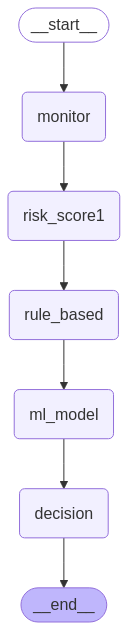

In [11]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod
fraud_detection_pipeline = graph.compile()
display(
    Image(
        fraud_detection_pipeline.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [12]:
transaction = {"amount": 1200, "location": "New York", "device_id": "XYZ123"}
state = create_initial_state(transaction)
final_state = fraud_detection_pipeline.invoke(state)
print("Fraud Detection Completed: Final Decision -", final_state["final_decision"])

Monitoring Transaction: {'amount': 1200, 'location': 'New York', 'device_id': 'XYZ123'}
Risk Score Assigned: 74
Rule-based Fraud Detection: True
ML Fraud Probability: 0.7694173409852972
Final Decision (LLM-Based): content="Okay, let's analyze this transaction to determine whether to approve or decline it.\n\nHere's a breakdown of the factors and a suggested decision:\n\n**Factors to Consider:**\n\n*   **Amount:** $1200 is a moderately high amount. Whether this is suspicious depends on the customer's typical spending habits.\n*   **Location:** New York is a common location, so by itself, it doesn't raise immediate suspicion.\n*   **Device ID:** `XYZ123` - We don't have context on whether this device is associated with fraudulent activity or is new/unusual for this customer.  This is a key piece of information we'd ideally want to know.\n*   **Risk Score:** 74 - This is a fairly high risk score. The threshold for concern depends on the specific risk scoring system, but a score of 74 like